In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [92]:

df = pd.read_excel("/home/satyukt/Projects/1000/soil_health/Sample Data_Soil Test_2.xlsx")
rec = 2000
df_tmp = df.loc[:rec, :]

In [94]:
df_pred = pd.read_csv("first2000.csv").loc[:rec, :]

In [95]:
def plot(dff, y_test, i):
    m, b = np.polyfit(dff['y_test'] , dff['preds'],1 )
    plt.subplots(1,1)
    plt.scatter(dff['y_test'],dff['preds'])
    plt.title(i)
    plt.plot(y_test, m*y_test + b)
    plt.xlabel('Field')
    plt.ylabel('Predicted')


def cal_error(dff, y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions,squared=False)
    var_pred = predictions.var()
    corr = y_test.corr(predictions) 
    bias = (predictions - y_test).sum()/(y_test.size)
    # print(bias)
    return mae, rmse, var_pred, corr, bias

P: mae -> 14.694822573645359  rmse -> 16.871645206763166  var_pred -> 29.977393263813127  corr -> 0.32487100220817544 bias -> -14.361597525681836
N: mae -> 96.13117221160606  rmse -> 110.5492218223567  var_pred -> 589.8487222864028  corr -> -0.21797121653591278 bias -> -95.81048218938878
OC: mae -> 0.4496165058622542  rmse -> 0.49526551489367177  var_pred -> 0.10015879297755172  corr -> -0.5941944182847558 bias -> -0.042306620932657066
K: mae -> 176.91587937336752  rmse -> 251.51384865336752  var_pred -> 47892.13006686284  corr -> -0.23601710091538267 bias -> 113.78369367156094
pH: mae -> 0.6193429890848021  rmse -> 0.7908454388731084  var_pred -> 0.18703229040104716  corr -> 0.34837030570337985 bias -> 0.5174916036943783


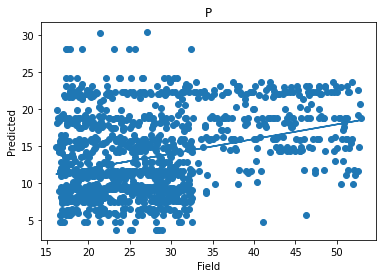

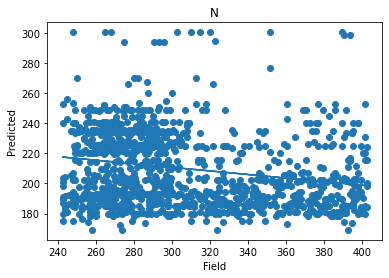

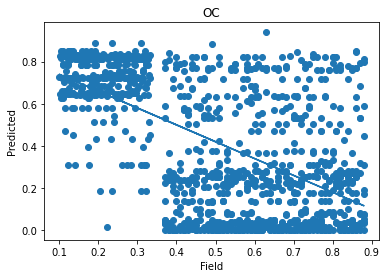

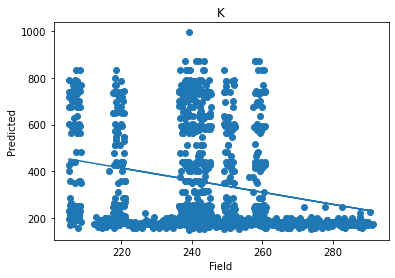

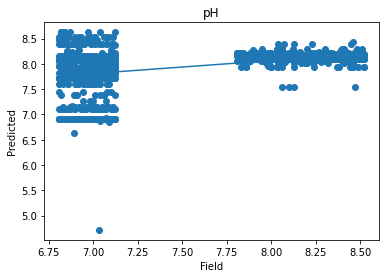

In [96]:
params = ['P', 'N', 'OC', 'K', 'pH']

bias_crr = [-13.122, -115.150, -0.38, 238.1393, 0.8017]
fig, ax = fig
for i, j in zip(params, bias_crr):
    y_test = df_tmp.loc[:,i]

    preds = df_pred.loc[:, i]#.apply(lambda x: x - j)

    dff = pd.concat([y_test.reset_index(drop=True),pd.DataFrame(preds)],axis=1)
    dff.columns = ['y_test','preds']
    dff.dropna(inplace=True)
    mae, rmse, var_pred, corr, bias = cal_error(dff, dff.loc[:,"y_test"], dff.loc[:,"preds"])
    
    print(f"{i }:", "mae ->", mae, " rmse ->", rmse, " var_pred ->" ,var_pred, " corr ->", corr, "bias ->" , bias )
    plot(dff, dff['y_test'], i)



In [ ]:

# soil_cr = df.corr(method='pearson')




# dff, y_test, predictions= gen_predictions(model, target)
mae, rmse, var_pred, corr = cal_error(dff, y_test, predictions)

# sb.set(style="white")

# # Generate a mask for the upper triangle
# mask = np.zeros_like(soil_cr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sb.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sb.heatmap(soil_cr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
# display(correlation_data_frame.describe())


# #Scatter matrix depicting correlation of soil nutrients
# pd.plotting.scatter_matrix(
#     correlation_data_frame,
#     figsize  = [15, 15],
# #     marker   = ".",
# #     s        = 0.2,
# #     diagonal = "kde"
# )


    # plot(dff, y_test)